<a href="https://colab.research.google.com/github/BelandyG/Project-2-Options/blob/main/Project_2_Part_3_Fastfood_Nutrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fastfood Nutrition

Name: Beland Gard

https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition

This Fast Food Nutrition Dataset, which provides a comprehensive breakdown of the nutritional content of various fast food products from popular fast food chains Fast food is known for its convenience and affordability, but it is also infamous for its high-calorie, high-fat, and high-sugar content. This dataset aims to shed light on the nutritional value of these fast food products, helping consumers make more informed decisions about their food choices.


To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

sns.set_style('darkgrid')
sns.set(font_scale=1.3)
          
filename = ('/content/fastfood.csv')
df = pd.read_csv(filename)
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [ ]:
# shape
print(f"This dataset has {df.shape[0]} rows, each representing a reading of a \
Food Type. It has {df.shape[1]} columns, {df.shape[1]-1} feature columns \
(X) and 1 target column (y).")

This dataset has 515 rows, each representing a reading of a Food Type. It has 17 columns, 16 feature columns (X) and 1 target column (y).


In [ ]:
# check for and delete any duplicates
print(f"There are {df.duplicated().sum()} duplicated rows in this dataset.")
print("Deleting duplicates...")
df.drop_duplicates(inplace = True)
print(f"Now there are {df.duplicated().sum()} duplicated rows in this dataset.")

There are 2 duplicated rows in this dataset.
Deleting duplicates...
Now there are 0 duplicated rows in this dataset.


In [ ]:
#Identify missing values.
sum_missing = df.isna().sum()
df.isna().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          212
vit_c          208
calcium        208
salad            0
dtype: int64

In [ ]:
# preprocess 'Defaulted' column

# instantiate scaler
scaler = StandardScaler()

# instantiate imputer
most_freq_imputer = SimpleImputer(strategy = 'most_frequent', 
                                  add_indicator = True)

# make pipeline
defaulted_pipe = make_pipeline(most_freq_imputer, scaler)

# make tuple
defaulted_tuple = (defaulted_pipe, ['Defaulted'])

In [ ]:
# I will address missing values by filling with 0. 
#Assuming those values are missing because they might not contain those nutritional benefits.
#df['fiber'] = df['fiber'].fillna(0) 
#df['protein'] = df['protein'].fillna(0) 
#df['vit_a'] = df['vit_a'].fillna(0) 
#df['vit_c'] = df['vit_c'].fillna(0) 
#df['calcium'] = df['calcium'].fillna(0) 

In [ ]:
#Check
df.isna().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          212
vit_c          208
calcium        208
salad            0
dtype: int64

In [ ]:
#Identify and address any inconsistencies in categorical values
df.describe(include = 'object').round(2)

,restaurant,item,salad
count,513,513,513
unique,8,505,1
top,Taco Bell,Crispy Chicken Sandwich,Other
freq,113,3,513


In [ ]:
df.describe(include = 'number')

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,501.000000,513.000000,512.000000,301.000000,305.000000,305.000000
mean,531.111111,238.945419,26.604288,8.152047,0.462963,72.553606,1247.309942,45.647173,4.127745,7.272904,27.923828,18.857143,20.170492,24.852459
std,282.900251,166.683320,18.442620,6.431223,0.840615,63.259522,691.157795,24.924070,3.038363,6.770483,17.709331,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.000000,2.000000,3.000000,15.750000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,25.000000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [ ]:
#check for inconsistent values in Numeric columns
for col in list(df.select_dtypes(include='number')):
  print(col)
  print(df[col].value_counts())
  print()

calories
350     13
380     12
320     12
540     11
430     11
        ..
1350     1
1080     1
1190     1
1510     1
160      1
Name: calories, Length: 113, dtype: int64

cal_fat
250    19
160    19
80     18
170    16
140    15
       ..
720     1
567     1
738     1
387     1
10      1
Name: cal_fat, Length: 117, dtype: int64

total_fat
18     23
28     19
14     17
24     17
26     16
       ..
141     1
100     1
70      1
87      1
1       1
Name: total_fat, Length: 80, dtype: int64

sat_fat
4.0     48
7.0     41
5.0     37
8.0     36
9.0     33
3.0     32
6.0     31
10.0    27
12.0    24
11.0    22
1.0     21
4.5     19
2.0     18
14.0    14
13.0    13
3.5     12
2.5     10
1.5      8
17.0     7
18.0     7
24.0     6
15.0     6
0.5      5
0.0      5
16.0     5
20.0     4
32.0     3
21.0     3
22.0     3
25.0     2
28.0     2
26.0     1
19.0     1
31.0     1
34.0     1
29.0     1
47.0     1
36.0     1
27.0     1
43.0     1
Name: sat_fat, dtype: int64

trans_fat
0.0    333
1.0   

There don't seem to be an incosistencies in categorical data.

# Univariate visuals for the target and all features. Identified outliers

<Axes: >

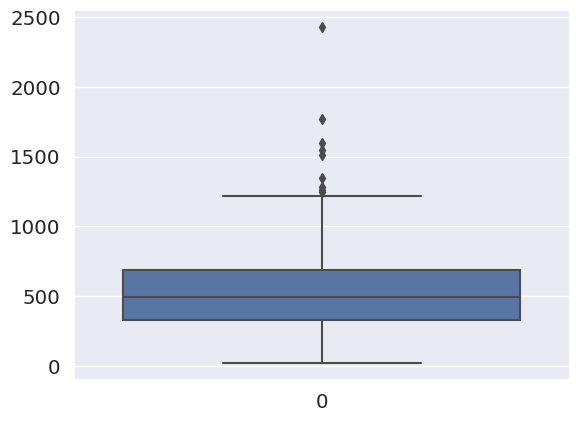

In [ ]:
# There seems to be an outliers in calories around 2500. This will be evaluated further 
#Target
sns.boxplot(df['calories'])

<Axes: >

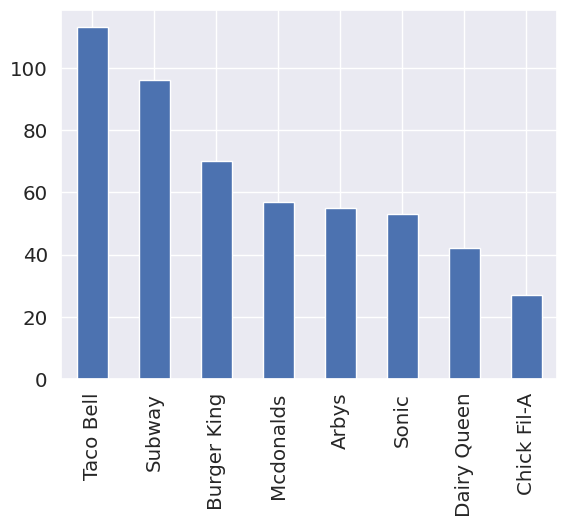

In [ ]:
# Taco Bell has the highet numbers compared to the rest of the restraunts
df['restaurant'].value_counts().head(10).plot.bar()

<Axes: >

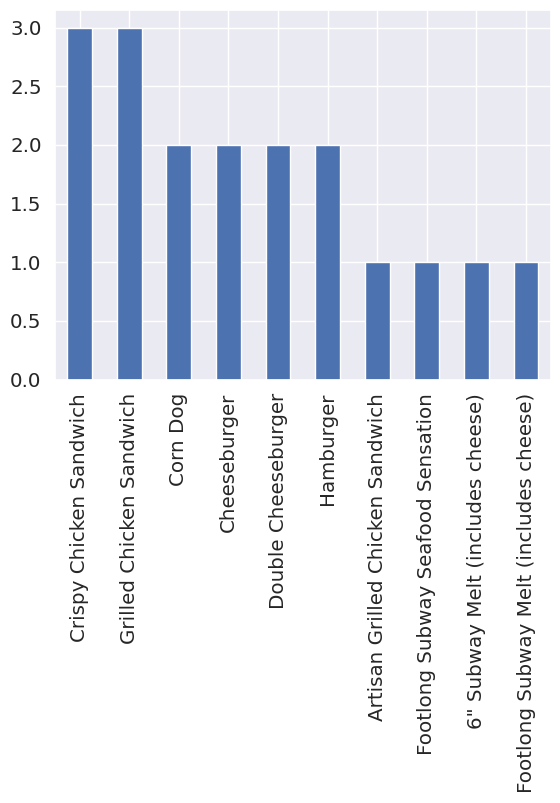

In [ ]:
df['item'].value_counts().head(10).plot.bar()

<Axes: >

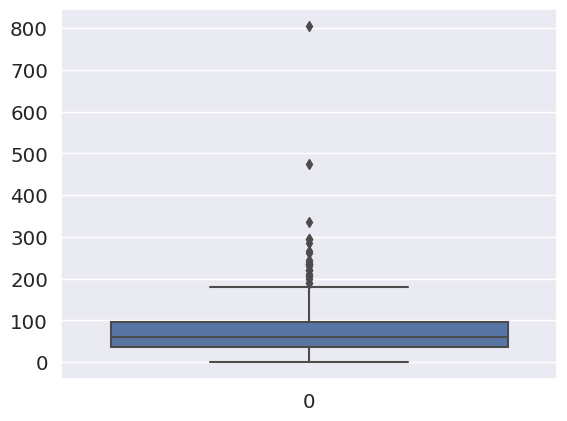

In [ ]:
# Outlier around 800
sns.boxplot(df['cholesterol'])

<Axes: >

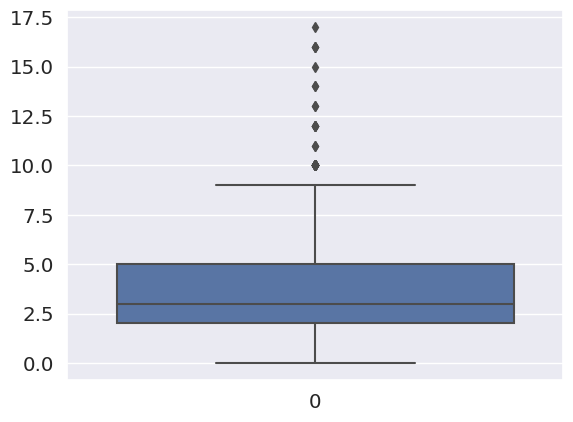

In [ ]:
sns.boxplot(df['fiber'])

<Axes: >

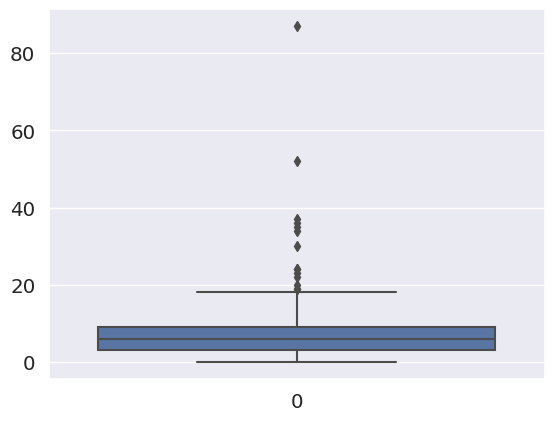

In [ ]:
#Outlier above 80
sns.boxplot(df['sugar'])

<Axes: >

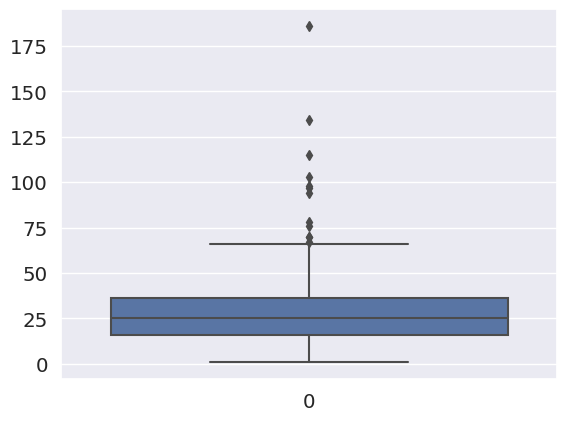

In [ ]:
sns.boxplot(df['protein'])

<Axes: >

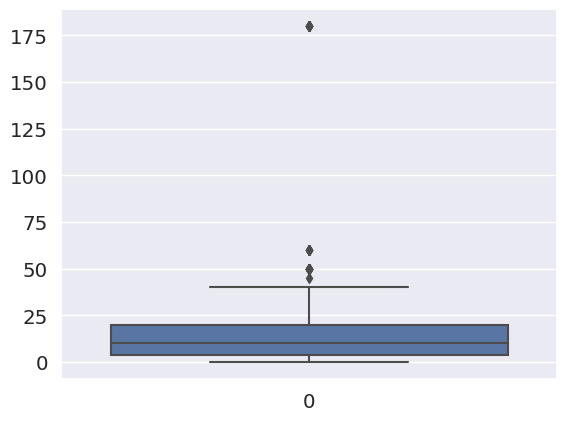

In [ ]:
#Outlier above 175
sns.boxplot(df['vit_a'])

<Axes: >

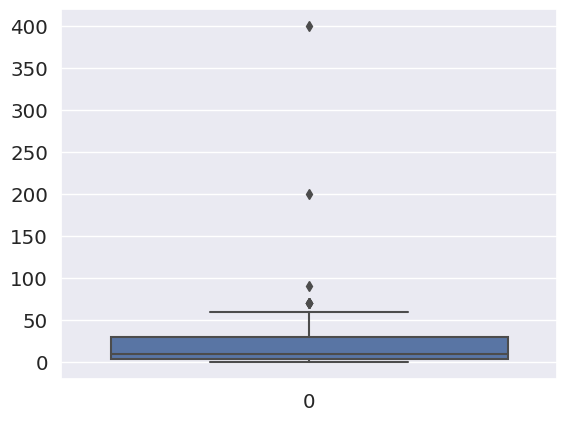

In [ ]:
# 2 Outliers around 200, 400
sns.boxplot(df['vit_c'])

<Axes: >

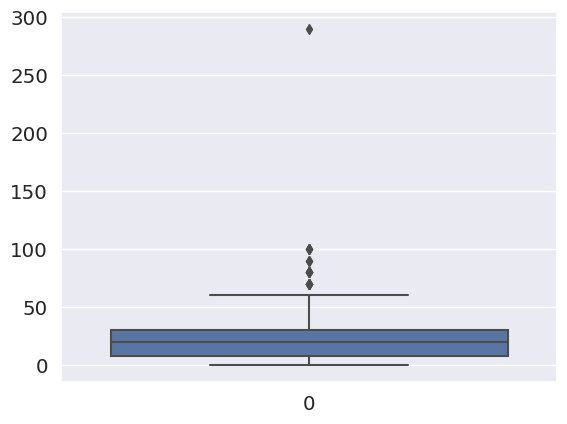

In [ ]:
#Outlier around 300 
sns.boxplot(df['calcium'])

<Axes: >

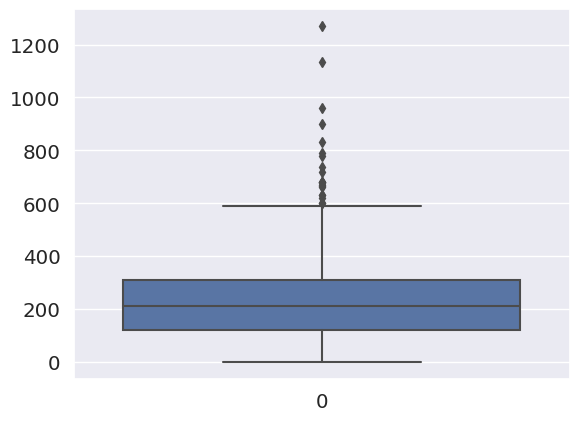

In [ ]:
sns.boxplot(df['cal_fat'])

<Axes: >

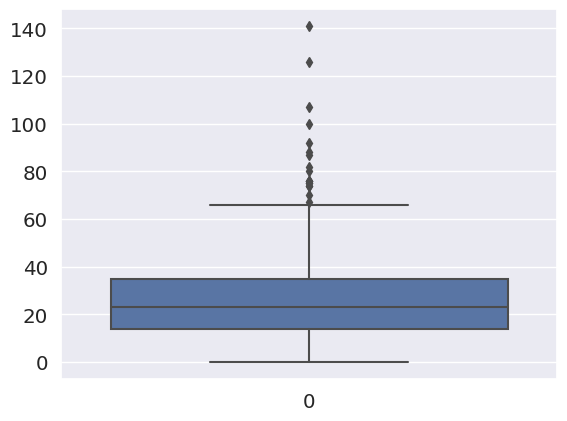

In [ ]:
sns.boxplot(df['total_fat'])

<Axes: >

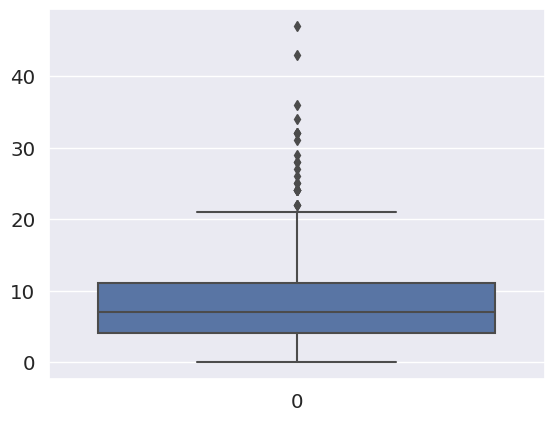

In [ ]:
sns.boxplot(df['sat_fat'])

<Axes: >

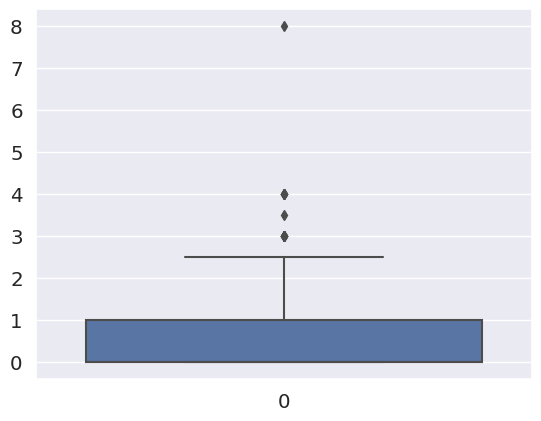

In [ ]:
# Outlier around 8
sns.boxplot(df['trans_fat'])

<Axes: >

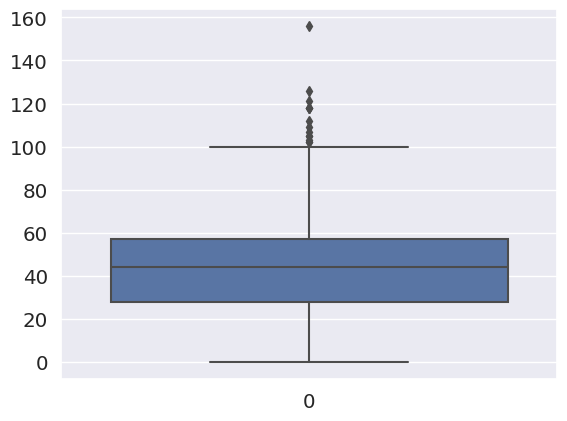

In [ ]:
sns.boxplot(df['total_carb'])

<Axes: >

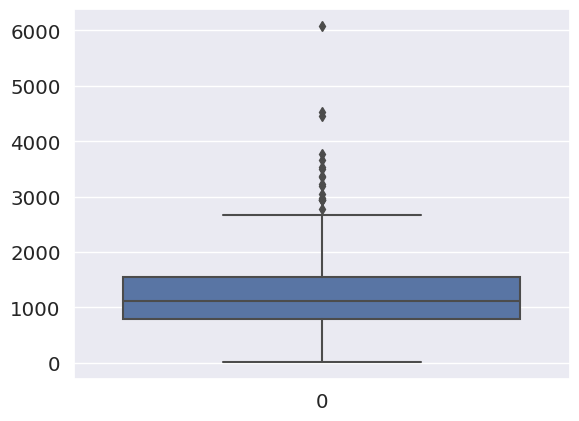

In [ ]:
sns.boxplot(df['sodium'])

<Axes: >

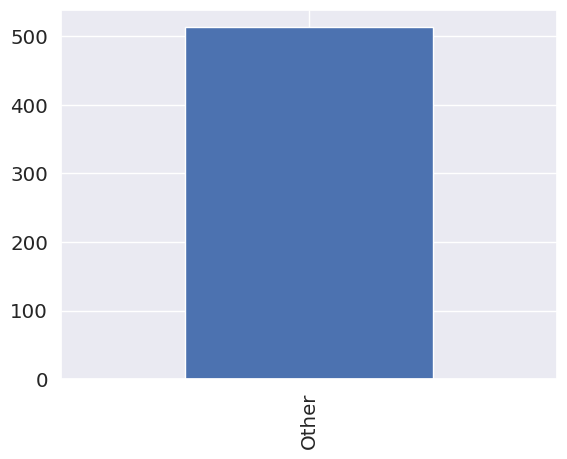

In [ ]:
df['salad'].value_counts().head(10).plot.bar()

KeyError: ignored

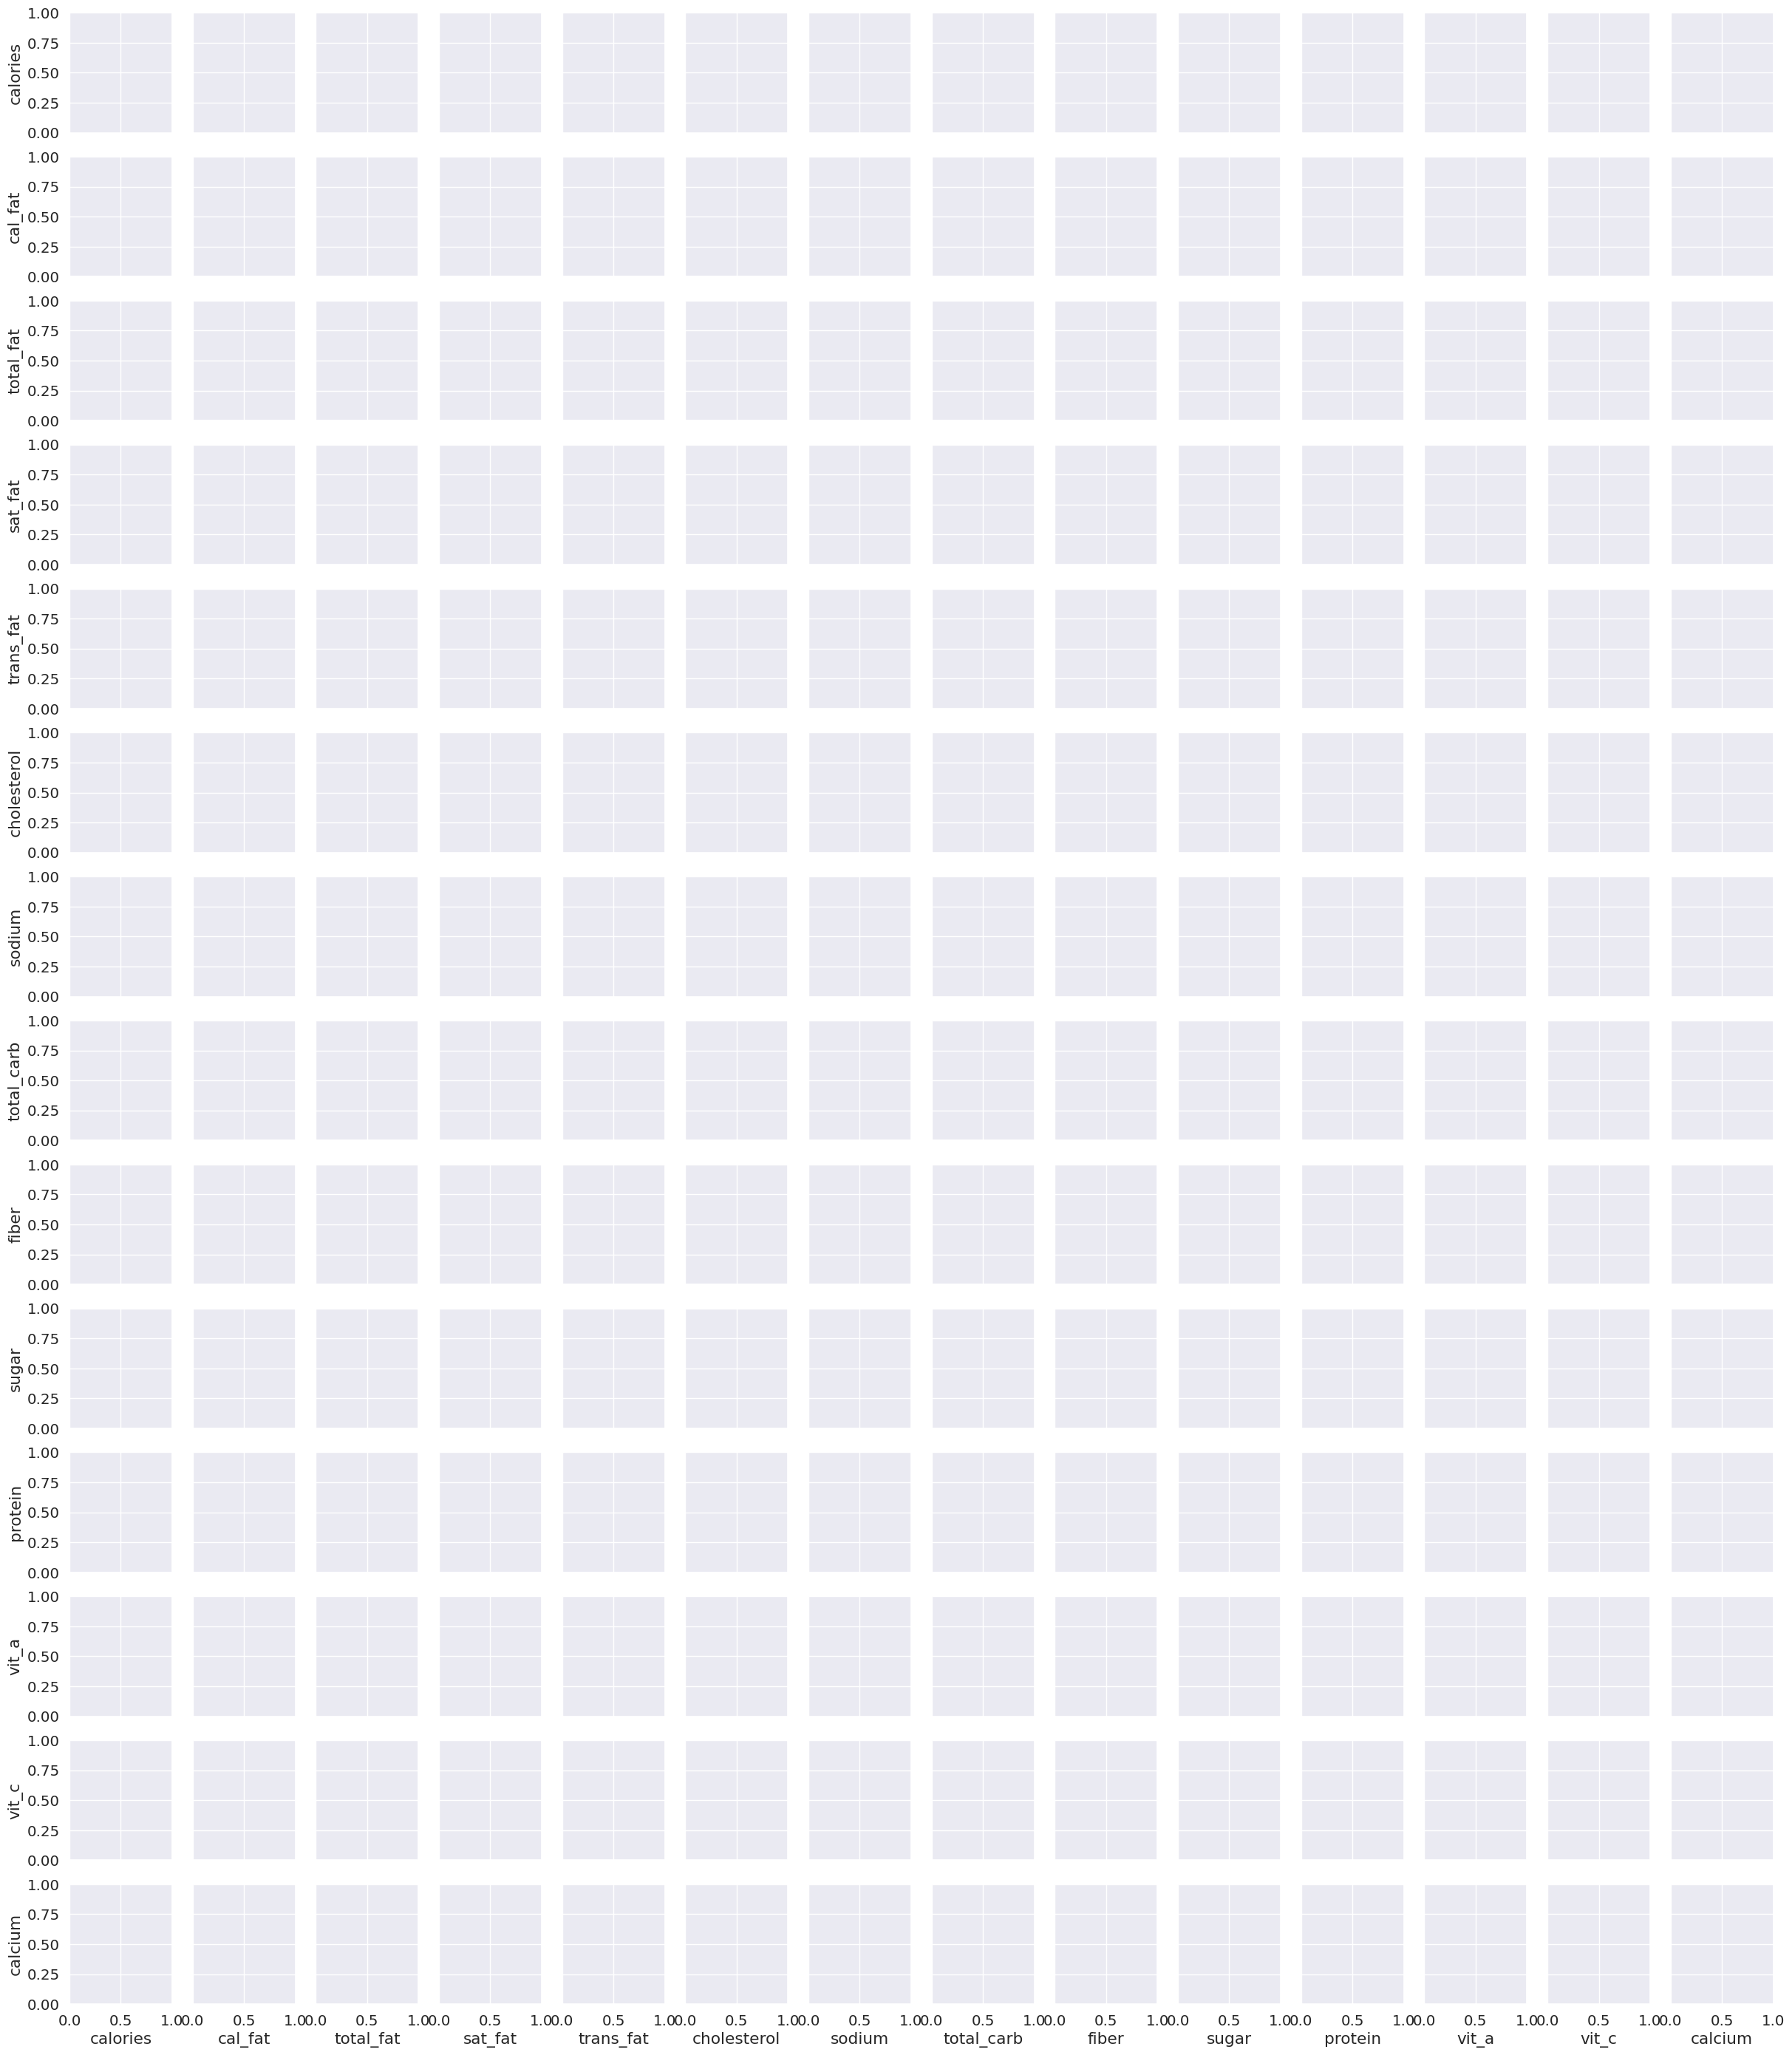

In [ ]:
sns.pairplot(df, 
    aspect=.85,
    hue='transmission');

In [ ]:
df.corr()

# New Section